# Epitopes

We explore the epitopes in the Absolut dataset.

1. First we are interested in evaluating where we can find epitope information. A first place to looks is the Task4 from Absolut. **NOTE:** In Task4 we have data only for 1% binders! We need to first evaluate if we have the epitope info in the UIDs, then we can extrapolate. Otherwise, we have to look only at the epitopes from 1% binders (which implies no vs Weak).

In [5]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re

from NegativeClassOptimization import config, ml
from NegativeClassOptimization import utils
from NegativeClassOptimization import preprocessing

/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
df = pd.read_csv(config.DATA_SLACK_1_PARATOPES, sep='\t')

In [7]:
print(df.shape)
df.head()

(8470232, 13)


,Slide,Label,hotspot_ID,seqAGEpitope,motifAGEpitope,agregatesAGEpitope,chemicalAGEpitope,seqABParatope,motifABParatope,agregatesABParatope,chemicalABParatope,AAcompoFullSlice,sizeCDR3
0,LLGLYWYFDVW,1ADQ_A,1ADQ_A_H1,S1W1V1D1V2Q1V3N1A1K1T2V1L2H1N1Y1,X1--X1--X1X1--X2X1X3--X1X1X1--X2X1X2X1--X1--X1,S1--W1--V1D1--V2Q1V3--N1A1K1--T2V1L2H1--N1--Y1,p1--r1--n1c1--n2p1n3--p1n1c1--p2n1n2c1--p1--r1,L3L4G3L1Y2Y2F2V2W2*,X3X4X3X1X2--X2X2--X2X2*,L3L4G3L1Y2--Y2F2--V2W2*,n3n4n3n1r2--r2r2--n2r2*,0_0_0.0909091_0_0.0909091_0.0909091_0_0_0_0.27...,15
1,YYSNYWYFDVW,1ADQ_A,1ADQ_A_H2,P1V1F1V3D3V1S1Q2Q1V1T1K1P1E1Y1R2V1V1,X1--X1X1--X3--X3X1X1X2--X1X1--X1X1X1--X1--X1X2...,P1--V1F1--V3--D3V1S1Q2--Q1V1--T1K1P1--E1--Y1R2...,n1--n1r1--n3--c3n1p1p2--p1n1--p1c1n1--c1--r1c2...,Y2Y3N2Y1W3Y1F4D1V4W3*,X2X3--X2X1X3X1X4X1X4X3*,Y2Y3--N2Y1W3Y1F4D1V4W3*,r2r3--p2r1r3r1r4c1n4r3*,0_0_0.0909091_0_0.0909091_0_0_0_0_0_0_0.090909...,14
2,AILLLRGKAYW,1ADQ_A,1ADQ_A_H1,L1R1P1W1V1D2V1Q1V1A1K1T1V1L1H1Q3N1W1L1Y1,X1--X1--X1--X1--X1X2--X1X1X1--X1X1--X1X1X1X1X3...,L1--R1--P1--W1--V1D2--V1Q1V1--A1K1--T1V1L1H1Q3...,n1--c1--n1--r1--n1c2--n1p1n1--n1c1--p1n1n1c1p3...,A2I3L4L3L1R1G1K1A2Y1W4*,X2X3X4X3X1X1X1X1X2X1X4*,A2I3L4L3L1R1G1K1A2Y1W4*,n2n3n4n3n1c1n1c1n2r1r4*,0.181818_0_0_0_0_0.0909091_0_0.0909091_0.09090...,12
3,YYDYDWYFDVW,1ADQ_A,1ADQ_A_H2,P1V1F1V3D3V1S1Q2Q1V1T1K1P1E1Y1R2V1V1,X1--X1X1--X3--X3X1X1X2--X1X1--X1X1X1--X1--X1X2...,P1--V1F1--V3--D3V1S1Q2--Q1V1--T1K1P1--E1--Y1R2...,n1--n1r1--n3--c3n1p1p2--p1n1--p1c1n1--c1--r1c2...,Y2Y3Y2D1W3Y1F4D1V4W3*,X2X3--X2X1X3X1X4X1X4X3*,Y2Y3--Y2D1W3Y1F4D1V4W3*,r2r3--r2c1r3r1r4c1n4r3*,0_0_0.272727_0_0.0909091_0_0_0_0_0_0_0_0_0_0_0...,15
4,SLIYYGYGAWF,1ADQ_A,1ADQ_A_H1,L1R1P1W1V1D2V1Q1V1A1K1T1V1L1H1Q3N1W1L1Y1,X1--X1--X1--X1--X1X2--X1X1X1--X1X1--X1X1X1X1X3...,L1--R1--P1--W1--V1D2--V1Q1V1--A1K1--T1V1L1H1Q3...,n1--c1--n1--r1--n1c2--n1p1n1--n1c1--p1n1n1c1p3...,S2L3I4Y3Y1G1Y1G1A2W1F4*,X2X3X4X3X1X1X1X1X2X1X4*,S2L3I4Y3Y1G1Y1G1A2W1F4*,p2n3n4r3r1n1r1n1n2r1r4*,0.0909091_0_0_0_0.0909091_0.181818_0_0.0909091...,16


In [8]:
# Get the antigen sequences, to be used to 
# evaluate the epitopes location in the sequence
# space.

from Bio import SeqIO

# Read the fasta file
fasta_file = Path(config.DATA_BASE_PATH) / "Absolut_Antigens/antigens.fasta"
antigens = SeqIO.to_dict(SeqIO.parse(fasta_file, "fasta"))

In [9]:
# Filter for antigens in Mini-Absolut
df = df[df['Label'].str[:4].isin(config.ANTIGENS)]
df["Antigen"] = df["Label"].str[:4]
df["antigen_fullseq"] = df["Label"].apply(lambda x: str(antigens[x.replace("_", "|")].seq))
print(df.shape)

(518147, 15)


In [10]:
# Check the distribution of 1% across antigens, hotspots and epitopes
print(f"Shape: {df.shape}")
print(f"Num labels: {len(df['Label'].unique())}")
print(f"Num hotspots: {len(df['hotspot_ID'].unique())}")
print(f"Num epitopes: {len(df['seqAGEpitope'].unique())}")

Shape: (518147, 15)
Num labels: 10
Num hotspots: 24
Num epitopes: 222


In [11]:
df["Label"].unique()

array(['1ADQ_A', '1FBI_X', '1H0D_C', '1NSN_S', '1OB1_C', '1WEJ_F',
       '2YPV_A', '3RAJ_A', '3VRL_C', '5E94_G'], dtype=object)

In [12]:
# Explore for an example Ag: 1ADQ
df_ag = utils.load_binding_per_ag("1ADQ")
print(df_ag.shape)

(929718, 7)


In [13]:
df_ag = pd.merge(df_ag, df.query("Antigen == '1ADQ'"), on="Slide", how='left')
df_ag.head()

,ID_slide_Variant,CDR3,Best,Slide,Energy,Structure,Source,Label,hotspot_ID,seqAGEpitope,...,agregatesAGEpitope,chemicalAGEpitope,seqABParatope,motifABParatope,agregatesABParatope,chemicalABParatope,AAcompoFullSlice,sizeCDR3,Antigen,antigen_fullseq
0,977_04a,CARHLLGLYWYFDVW,True,LLGLYWYFDVW,-95.36,128932-LRRDURUUDU,mascotte,1ADQ_A,1ADQ_A_H1,S1W1V1D1V2Q1V3N1A1K1T2V1L2H1N1Y1,...,S1--W1--V1D1--V2Q1V3--N1A1K1--T2V1L2H1--N1--Y1,p1--r1--n1c1--n2p1n3--p1n1c1--p2n1n2c1--p1--r1,L3L4G3L1Y2Y2F2V2W2*,X3X4X3X1X2--X2X2--X2X2*,L3L4G3L1Y2--Y2F2--V2W2*,n3n4n3n1r2--r2r2--n2r2*,0_0_0.0909091_0_0.0909091_0.0909091_0_0_0_0.27...,15.0,1ADQ,PSVFLFPPKPKDTLMISRTPEVTCVVVDVSQEDPQVQFNWYVDGVQ...
1,1236_03a,CARYYSNYWYFDVW,True,YYSNYWYFDVW,-94.71,137248-RRDLDUDRDR,mascotte,1ADQ_A,1ADQ_A_H2,P1V1F1V3D3V1S1Q2Q1V1T1K1P1E1Y1R2V1V1,...,P1--V1F1--V3--D3V1S1Q2--Q1V1--T1K1P1--E1--Y1R2...,n1--n1r1--n3--c3n1p1p2--p1n1--p1c1n1--c1--r1c2...,Y2Y3N2Y1W3Y1F4D1V4W3*,X2X3--X2X1X3X1X4X1X4X3*,Y2Y3--N2Y1W3Y1F4D1V4W3*,r2r3--p2r1r3r1r4c1n4r3*,0_0_0.0909091_0_0.0909091_0_0_0_0_0_0_0.090909...,14.0,1ADQ,PSVFLFPPKPKDTLMISRTPEVTCVVVDVSQEDPQVQFNWYVDGVQ...
2,1674_04a,CARAYYSNYWYFDVW,True,YYSNYWYFDVW,-94.71,137248-RRDLDUDRDR,mascotte,1ADQ_A,1ADQ_A_H2,P1V1F1V3D3V1S1Q2Q1V1T1K1P1E1Y1R2V1V1,...,P1--V1F1--V3--D3V1S1Q2--Q1V1--T1K1P1--E1--Y1R2...,n1--n1r1--n3--c3n1p1p2--p1n1--p1c1n1--c1--r1c2...,Y2Y3N2Y1W3Y1F4D1V4W3*,X2X3--X2X1X3X1X4X1X4X3*,Y2Y3--N2Y1W3Y1F4D1V4W3*,r2r3--p2r1r3r1r4c1n4r3*,0_0_0.0909091_0_0.0909091_0_0_0_0_0_0_0.090909...,14.0,1ADQ,PSVFLFPPKPKDTLMISRTPEVTCVVVDVSQEDPQVQFNWYVDGVQ...
3,1738_01a,CAILLLRGKAYW,True,AILLLRGKAYW,-96.74,128868-LSRRLLSUSU,mascotte,1ADQ_A,1ADQ_A_H1,L1R1P1W1V1D2V1Q1V1A1K1T1V1L1H1Q3N1W1L1Y1,...,L1--R1--P1--W1--V1D2--V1Q1V1--A1K1--T1V1L1H1Q3...,n1--c1--n1--r1--n1c2--n1p1n1--n1c1--p1n1n1c1p3...,A2I3L4L3L1R1G1K1A2Y1W4*,X2X3X4X3X1X1X1X1X2X1X4*,A2I3L4L3L1R1G1K1A2Y1W4*,n2n3n4n3n1c1n1c1n2r1r4*,0.181818_0_0_0_0_0.0909091_0_0.0909091_0.09090...,12.0,1ADQ,PSVFLFPPKPKDTLMISRTPEVTCVVVDVSQEDPQVQFNWYVDGVQ...
4,3065_04a,CARNYYDYDWYFDVW,True,YYDYDWYFDVW,-95.48,137248-RRDLDUDRDR,mascotte,1ADQ_A,1ADQ_A_H2,P1V1F1V3D3V1S1Q2Q1V1T1K1P1E1Y1R2V1V1,...,P1--V1F1--V3--D3V1S1Q2--Q1V1--T1K1P1--E1--Y1R2...,n1--n1r1--n3--c3n1p1p2--p1n1--p1c1n1--c1--r1c2...,Y2Y3Y2D1W3Y1F4D1V4W3*,X2X3--X2X1X3X1X4X1X4X3*,Y2Y3--Y2D1W3Y1F4D1V4W3*,r2r3--r2c1r3r1r4c1n4r3*,0_0_0.272727_0_0.0909091_0_0_0_0_0_0_0_0_0_0_0...,15.0,1ADQ,PSVFLFPPKPKDTLMISRTPEVTCVVVDVSQEDPQVQFNWYVDGVQ...


In [14]:
# Compute number of NaNs per group -> we see that we have epitope data for all mascottes!
df_ag.groupby("Source").apply(lambda x: x.isna().sum())

,ID_slide_Variant,CDR3,Best,Slide,Energy,Structure,Source,Label,hotspot_ID,seqAGEpitope,...,agregatesAGEpitope,chemicalAGEpitope,seqABParatope,motifABParatope,agregatesABParatope,chemicalABParatope,AAcompoFullSlice,sizeCDR3,Antigen,antigen_fullseq
Source,,,,,,,,,,,,,,,,,,,,,
looserX,0,0,0,0,0,0,0,350113,350113,350113,...,350113,350113,350113,350113,350113,350113,350113,350113,350113,350113
mascotte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nonmascotte,0,0,0,0,0,0,0,500000,500000,500000,...,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000


In [15]:
df_ag_high = df_ag.query("Source == 'mascotte'")
print(df_ag_high.shape)

(79605, 21)


In [16]:
print(f'Number of unique epitopes: {df_ag_high["seqAGEpitope"].nunique()}')
print(f'Number of unique slides: {df_ag_high["Slide"].nunique()}')

Number of unique epitopes: 40
Number of unique slides: 48807


In [17]:
# Select the slide with the lowest Energy
df_ag_high = df_ag_high.sort_values("Energy").groupby("Slide").first().reset_index()
print(df_ag_high.shape)

(48807, 21)


As one can see below, the epitopes available in this raw format might be similar. To investigate, we process the epitopes and examine their locations in the antigen sequence space (and if required in structure space). Then we might manually select the most frequent epitopes that are semantically different.

In [18]:
df_ag_high.groupby("seqAGEpitope").apply(lambda x: x.shape[0]).sort_values(ascending=False)

seqAGEpitope
S1W1V1D1V2Q1V3N1A1K1T2V1L2H1N1Y1            17155
P1V1F1V3D3V1S1Q2Q1V1T1K1P1E1Y1R2V1V1        11777
L1R1P1W1V1D2V1Q1V1A1K1T1V1L1H1Q3N1W1L1Y1     7978
L2R1P1W1V1D2V1Q1V1K1V1L1Q3N1W1L1Y1A1         2829
L1R1P1W1V1D2V2Q1V2K1V1L1Q3N1W1L1Y1           2158
F1V3D3V1S1Q2Q1V1T1K1P1E1Y1R2V1V1             1516
L1R1P1W1V1D2V1Q1V1A1K1T1V1L1Q3N1W1L1Y1       1429
L1R1P1W1V1D2V1Q1V1K1V1L1Q3N1W1L1D1G1Y1G1      883
V3D1V1Q2Q2V2Q1N1T1K2P1E1Y1R1V1V1              651
F2F1V3D3V1S1Q2Q1V1T1K1P1E1R2V1V1              612
K1D1I1S1T1W1V1D1V1Q1V1A1K1V1T3V1L2N1Y1        562
W1V1D1V2Q1V3N1A1K1T2V1L2Q1N1Y1                402
L1P1P1E1Q1V1L1K1G1P1P1V1L1L3Y2R2L2            190
Q1Y1T1L2P1P1E1Q1V1L1K1G1L1L3Y1R2L1            178
W1V1D1V2Q1V3N1A1K1T1V1L1H1Q1N1Y1               73
L1R1P1W1V1D2G1V2Q1V1K1V1L1Q3N1W1L1Y1           68
K1D1I1S1T1W1V1D1V2Q1V2A1K1T2V1L2N1Y1E1         62
S1W1V1D1V2Q1V2A1K1T2V1L2H2Q1N1Y1               54
V3D1V1Q1Q2V2Q1N1T1K2P1E1Y1R1V1V1               45
L2P1P1E1Q1V1L1K1G1P1V1L1L4Y1R2L1     

In [19]:
# df["epitope_fullseq"] = 
# agregatesAGEpitope

def convert_epitopecode_to_regex(aggregatesAGEpitope):
    """
    Convert the epitope code to a regex expression
    """
    regex_pattern = ""
    aa = "ACDEFGHIKLMNPQRSTVWY"
    for i in range(0, len(aggregatesAGEpitope), 2):
        if aggregatesAGEpitope[i] == "-":
            regex_pattern += "[A-Z]+"
        elif aggregatesAGEpitope[i] in aa:
            regex_pattern += f"({aggregatesAGEpitope[i]})"
        else:
            raise ValueError(f"Invalid character {i}")
    return regex_pattern


def mask_non_present_aminoacids(rgx, antigen_seq):
    """
    Masks non-present amino acids in the antigen sequence based on a regular expression pattern.

    Parameters:
    rgx (str): The regular expression pattern used to match amino acids in the antigen sequence.
    antigen_seq (str): The antigen sequence to be masked.

    Returns:
    str: The masked antigen sequence with non-present amino acids replaced by asterisks.
    """
    match = re.search(rgx, antigen_seq)
    L = len(match.groups())

    masked_seq = "*" * len(antigen_seq)
    for i in range(1, L+1):
        idx = match.span(i)[0]
        aa = match.group(i)
        masked_seq = masked_seq[:idx] + aa + masked_seq[idx+1:]

    return masked_seq

In [20]:
# Evaluate the distribution of epitopes per antigen, to get a better view of 
# the available dataset sizes that can be achieved.

for label in df.Label.unique():
    vc = df.query("Label == @label").value_counts(subset=["seqAGEpitope", "agregatesAGEpitope", "hotspot_ID"])
    vc = vc.reset_index(drop=False)
    print(label)
    vc = pd.DataFrame(vc)
    vc["perc"] = vc["count"] / vc["count"].sum()
    vc["cumsum"] = vc["perc"].cumsum()
    print(vc.loc[vc["count"] > 1000][["seqAGEpitope", "hotspot_ID", "count", "perc", "cumsum"]])
    print("\n")

    ## Print the epitope in the sequence space, by
    ## masking aa not participating in the epitope
    label_adapted = label.replace("_", "|")
    antigen_seq = str(antigens[label_adapted].seq)
    for agregatesAGEpitope in vc.loc[vc["count"] > 1000]["agregatesAGEpitope"]:
        rgx = convert_epitopecode_to_regex(agregatesAGEpitope)
        masked_seq = mask_non_present_aminoacids(rgx, antigen_seq)
        print(f"Epitope: {agregatesAGEpitope}")
        print(f"Masked sequence: {masked_seq}")
        print("\n")
    ##

    print("\n\n")

1ADQ_A
                               seqAGEpitope hotspot_ID  count      perc  \
0          S1W1V1D1V2Q1V3N1A1K1T2V1L2H1N1Y1  1ADQ_A_H1  17155  0.351486   
1      P1V1F1V3D3V1S1Q2Q1V1T1K1P1E1Y1R2V1V1  1ADQ_A_H2  11777  0.241297   
2  L1R1P1W1V1D2V1Q1V1A1K1T1V1L1H1Q3N1W1L1Y1  1ADQ_A_H1   7978  0.163460   
3      L2R1P1W1V1D2V1Q1V1K1V1L1Q3N1W1L1Y1A1  1ADQ_A_H1   2829  0.057963   
4        L1R1P1W1V1D2V2Q1V2K1V1L1Q3N1W1L1Y1  1ADQ_A_H1   2158  0.044215   
5          F1V3D3V1S1Q2Q1V1T1K1P1E1Y1R2V1V1  1ADQ_A_H2   1516  0.031061   
6    L1R1P1W1V1D2V1Q1V1A1K1T1V1L1Q3N1W1L1Y1  1ADQ_A_H1   1429  0.029279   

     cumsum  
0  0.351486  
1  0.592784  
2  0.756244  
3  0.814207  
4  0.858422  
5  0.889483  
6  0.918762  


Epitope: S1--W1--V1D1--V2Q1V3--N1A1K1--T2V1L2H1--N1--Y1
Masked sequence: *S*************************************W*VD*VQV*NAK******************TVLH***************************************************************************************************************************N*Y******

1NSN_S
                                   seqAGEpitope hotspot_ID  count      perc  \
0        I1D1T1V1K1M1T1V1T1Q1D1Y1G1R4G1V2Y1V2N1  1NSN_S_H1  23282  0.468856   
1  I1K1I2D1T1V1K1P1M1T1V1T1Q1D1K1Y1G1R3G1V1V1N1  1NSN_S_H1  10063  0.202650   
2        I1K1I2D2D1T1V1K1P1M1T1V1T2E1H1Y1G1R1V1  1NSN_S_H1   8750  0.176209   
3        I1I1D3D1T1V1K1P1M1T1V1T2E1K1H1Y1G1R1V1  1NSN_S_H1   3315  0.066758   
4        I1I1D2D1T1V1K1P1M1T1V1T3E1H1K1Y1G1R1V1  1NSN_S_H1   2312  0.046559   

     cumsum  
0  0.468856  
1  0.671507  
2  0.847715  
3  0.914473  
4  0.961033  


Epitope: I1D1--T1V1K1--M1T1--V1--T1--Q1--D1--Y1G1R4G1--V2--Y1V2--N1
Masked sequence: **************ID**TVK*******MT*****************V**********T*****************Q**D*YGRG**********************V*YV***********************N***


Epitope: I1K1--I2D1--T1V1K1--P1M1T1--V1--T1--Q1--D1K1Y1G1R3G1--V1--V1--N1
Masked sequence: ***********IK*ID**TVK******PMT*****************V**********T*****************Q**DKYGRG**********************V**V****

Explore the epitopes frequencies in Miniabsolut. Luckily, we have the epitopes from Absolut, obtained when we ran Absolut with the new feature from Philippe to compute the binding energies per amino acid.

In [21]:
ag = "1ADQ"
ag_wchain = "1ADQ|A"
base_path = config.DATA_MINIABSOLUT / f"{ag}/energy_contributions"

df_high = pd.read_csv(base_path / "high_test_5000_absolut_energy_contributions.tsv", sep='\t', header=1)
df_weak = pd.read_csv(base_path / "looserX_test_5000_absolut_energy_contributions.tsv", sep='\t', header=1)
df_nonb = pd.read_csv(base_path / "95low_test_5000_absolut_energy_contributions.tsv", sep='\t', header=1)
df_high["class"] = "high"
df_weak["class"] = "weak"
df_nonb["class"] = "nonb"

# Concatenate all
df_conc = pd.concat([df_high, df_weak, df_nonb])
df_conc.head()

,ID_slide_Variant,CDR3,Best,Slide,Energy,Structure,interactionCode,AGboundPositions,hotspot_ID,seqAGEpitope,...,segmentedAGEpitope,segmentedABParatope,AAcompoFullSlice,AAcompoFullCDR,sizeCDR3,InterCodeInternal,contribPerAAepi,contribPerAAparaBind,contribPerAAparaFold,class
0,3487_02a,CASLIYYGYGAWFAYW,True,SLIYYGYGAWF,-95.03,128868-LSRRLLSUSU,k0013k0017k0019c0039c0041d0042h0042d0044c0045b...,13-17-19-39-41-42-44-45-46-49-50-69-70-71-72-7...,1ADQ_A_H1,L1R1P1W1V1D2V1Q1V1A1K1T1V1L1H1Q3N1W1L1Y1,...,P0S0V0F0L0F0P0P0K0P0K0D0T0[L1]M0I0S0[R1]T0[P1]...,[S2L3I4Y3Y1G1Y1G1A2W1F4],0.0909091_0_0_0_0.0909091_0.181818_0_0.0909091...,0.1875_0.0625_0_0_0.0625_0.125_0_0.0625_0_0.06...,16,be-dg-,"L13:1_-7.28,R17:1_-3.98,P19:1_-4.25,W39:1_-5.7...","Sa:2_-3.97,Lb:3_-16.33,Ic:4_-20.75,Yd:3_-10.14...","Lb:1_-5.67,Yd:1_-4.17,Ye:1_-5.67,Yg:1_-4.17,",high
1,8741_02a,CALYPYGNFPFDYW,True,LYPYGNFPFDY,-94.95,128996-RLLRLUSURD,i0013k0013i0017i0019a0039a0041d0042f0042d0044a...,13-17-19-39-41-42-44-45-46-50-70-71-73-74-75-7...,1ADQ_A_H1,L2R1P1W1V1D2V1Q1V1K1V1L1Q3N1W1L1Y1A1,...,P0S0V0F0L0F0P0P0K0P0K0D0T0[L2]M0I0S0[R1]T0[P1]...,[L4Y3P1Y3G1N1F2P1F4]D0[Y2],0_0_0.0909091_0_0.181818_0.0909091_0_0_0_0.090...,0.0714286_0.0714286_0.0714286_0_0.142857_0.071...,14,ad-,"L13:2_-12.95,R17:1_-3.98,P19:1_-4.25,W39:1_-6....","La:4_-22.33,Yb:3_-11.84,Pc:1_-4.2,Yd:3_-10.14,...","La:1_-5.67,Yd:1_-5.67,",high
2,9142_00a,CARQLFFSFDVW,True,CARQLFFSFDV,-94.55,132966-BDRSUUSLUL,a0016f0039f0041e0042e0044k0044f0045g0046i0046k...,16-39-41-42-44-45-46-48-49-50-69-70-71-72-74-81,1ADQ_A_H1,S1W1V1D1V2Q1V3N1A1K1T2V1L2H1N1Y1,...,P0S0V0F0L0F0P0P0K0P0K0D0T0L0M0I0[S1]R0T0P0E0V0...,[C2A2]R0[Q1L3F4F3S2F2]D0[V2],0.0909091_0.0909091_0.0909091_0_0.272727_0_0_0...,0.0833333_0.0833333_0.0833333_0_0.25_0_0_0_0_0...,12,ch-cj-dg-dk-,"S16:1_-2.86,W39:1_-6.16,V41:1_-6.29,D42:1_-3.4...","Ca:2_-6.46,Ab:2_-7.23,Qd:1_-4.04,Le:3_-13.62,F...","Rc:2_-3.91,Qd:2_-7.17,Fg:1_-4.1,Sh:1_-1.62,Dj:...",high
3,9701_01a,CARFDYDWYFDVW,False,ARFDYDWYFDV,-95.19,141281-BDUDLDRLUL,a0003c0003a0005g0025i0025k0025c0027e0027g0027h...,3-5-25-27-28-29-30-34-35-51-52-53-55-63-65-85,1ADQ_A_H2,F2F1V3D3V1S1Q2Q1V1T1K1P1E1R2V1V1,...,P0S0V0[F2]L0[F1]P0P0K0P0K0D0T0L0M0I0S0R0T0P0E0...,[A2]R0[F3]D0[Y2D1W3Y3F4D1V4],0.0909091_0_0.272727_0_0.181818_0_0_0_0_0_0_0_...,0.0769231_0.0769231_0.230769_0_0.153846_0_0_0_...,13,NaN,"F3:2_-12.07,F5:1_-4.81,V25:3_-16.99,D27:3_-9.0...","Aa:2_-9.62,Fc:3_-14.72,Ye:2_-5.54,Df:1_-1.46,W...",NaN,high
4,13403_00a,CARYLKLGLFDYW,True,CARYLKLGLFD,-94.34,137184-BDLDUDRDRR,a0003e0025g0025i0025a0027c0027e0027j0028c0029d...,3-25-27-28-29-30-34-35-51-52-53-55-62-63-65-85,1ADQ_A_H2,F1V3D3V1S1Q2Q1V1T1K1P1E1Y1R2V1V1,...,P0S0V0[F1]L0F0P0P0K0P0K0D0T0L0M0I0S0R0T0P0E0V0...,[C3]A0[R2Y1L3K1L4G1L4F3]D0,0.0909091_0.0909091_0.0909091_0_0.0909091_0.09...,0.0769231_0.0769231_0.0769231_0_0.0769231_0.07...,13,ej-fk-hk-,"F3:1_-5.8,V25:3_-19.44,D27:3_-8.1,V28:1_-6.29,...","Ca:3_-10.78,Rc:2_-3.91,Yd:1_-2.97,Le:3_-13.91,...","Le:1_-7.28,Kf:1_-1.68,Gh:1_-1.59,Fj:1_-7.28,Dk...",high


In [34]:
# Get the 20 most frequent seqAGEpitope
# and represent their counts and % in the 
# 3 classes.
# vc = df_conc["seqAGEpitope"].value_counts().head(20)
# vc = vc.reset_index(drop=False) 
# vc.columns = ["seqAGEpitope", "count"]
# vc["perc"] = vc["count"] / vc["count"].sum()
# vc

# Get the counts per class, preserve the other columns
# and compute the % of each class.

from scipy import stats

dfs = []

for ag_wchain in config.ANTIGENS_WCHAINS:

    ag = ag_wchain.split("_")[0]
    base_path = config.DATA_MINIABSOLUT / f"{ag}/energy_contributions"

    df_high = pd.read_csv(base_path / "high_test_5000_absolut_energy_contributions.tsv", sep='\t', header=1)
    df_weak = pd.read_csv(base_path / "looserX_test_5000_absolut_energy_contributions.tsv", sep='\t', header=1)
    df_nonb = pd.read_csv(base_path / "95low_test_5000_absolut_energy_contributions.tsv", sep='\t', header=1)
    df_high["class"] = "high"
    df_weak["class"] = "weak"
    df_nonb["class"] = "nonb"

    # Concatenate all
    df_conc = pd.concat([df_high, df_weak, df_nonb])

    vc_class = df_conc.groupby(["seqAGEpitope", "agregatesAGEpitope", "hotspot_ID", "class"]).size().unstack(fill_value=0)
    vc_class = vc_class.reset_index(drop=False)
    vc_class["total"] = vc_class["high"] + vc_class["nonb"] + vc_class["weak"]

    # Compute OR and p-val for enrichment of epitope in
    # high w.r.t. nonb and weak.
    for i, row in vc_class.iterrows():
        high = row["high"]
        nonb = row["nonb"]
        weak = row["weak"]

        high_s = vc_class["high"].sum()
        nonb_s = vc_class["nonb"].sum()
        weak_s = vc_class["weak"].sum()

        # contingency table 1
        contingency_table = np.array(
            [
                [high, weak + nonb], 
                [high_s - high, weak_s + nonb_s - weak - nonb],
            ])
        oddsratio, pvalue = stats.fisher_exact(contingency_table)
        vc_class.loc[i, "OR_high"] = oddsratio
        vc_class.loc[i, "OR_high_pval"] = pvalue
        # contingency table 2
        contingency_table = np.array(
            [
                [weak, high + nonb], 
                [weak_s - weak, high_s + nonb_s - high - nonb],
            ])
        oddsratio, pvalue = stats.fisher_exact(contingency_table)
        vc_class.loc[i, "OR_weak"] = oddsratio
        vc_class.loc[i, "OR_weak_pval"] = pvalue
        # contingency table 3
        contingency_table = np.array(
            [
                [nonb, high + weak], 
                [nonb_s - nonb, high_s + weak_s - high - weak],
            ])
        oddsratio, pvalue = stats.fisher_exact(contingency_table)
        vc_class.loc[i, "OR_nonb"] = oddsratio
        vc_class.loc[i, "OR_nonb_pval"] = pvalue

    # Compute %
    vc_class["perc_high"] = vc_class["high"] / vc_class["total"]
    vc_class["perc_weak"] = vc_class["weak"] / vc_class["total"]
    vc_class["perc_nonb"] = vc_class["nonb"] / vc_class["total"]
    vc_class["perc_total"] = vc_class["total"] / vc_class["total"].sum()
    vc_class = vc_class.sort_values("total", ascending=False)
    vc_class["perc_cumsum"] = vc_class["perc_total"].cumsum()
    vc_class.columns.name = None
    vc_class.reset_index(inplace=True, drop=True)

    vc_class["perc_from_high"] = vc_class["high"] / vc_class["high"].sum()  # % of high

    # As above, add to each row the masked antigen sequence
    # to visualize the epitope in the sequence space.
    vc_class["masked_seq"] = vc_class.apply(lambda x: mask_non_present_aminoacids(
        convert_epitopecode_to_regex(x["agregatesAGEpitope"]), 
        str(antigens[ag_wchain.replace("_", "|")].seq)
    ), axis=1)
    vc_class["antigen"] = ag
    vc_class["antigen_wchain"] = ag_wchain
    
    # vc_class.head(20)
    out_path = config.DATA_BASE_PATH / "Absolut_Antigens/Epitopes"
    vc_class.to_csv(out_path / f"{ag}_epitopes_distribution.tsv", sep='\t', index=False)
    dfs.append(vc_class)

In [35]:
df_epi = pd.concat(dfs)
df_epi.head()

,seqAGEpitope,agregatesAGEpitope,hotspot_ID,high,nonb,weak,total,OR_high,OR_high_pval,OR_weak,...,OR_nonb_pval,perc_high,perc_weak,perc_nonb,perc_total,perc_cumsum,perc_from_high,masked_seq,antigen,antigen_wchain
0,S1W1V1D1V2Q1V3N1A1K1T2V1L2H1N1Y1,S1--W1--V1D1--V2Q1V3--N1A1K1--T2V1L2H1--N1--Y1,1ADQ_A_H1,857,1748,1804,4409,0.375481,3.819701e-127,1.602428,...,9.592837e-26,0.194375,0.409163,0.396462,0.293992,0.293992,0.171434,*S*************************************W*VD*VQ...,1ADQ,1ADQ_A
1,P1V1F1V3D3V1S1Q2Q1V1T1K1P1E1Y1R2V1V1,P1--V1F1--V3--D3V1S1Q2--Q1V1--T1K1P1--E1--Y1R2...,1ADQ_A_H2,1570,246,786,2602,3.977876,4.059839e-214,0.840572,...,2.292776e-210,0.603382,0.302075,0.094543,0.173501,0.467493,0.314063,P*VF*********************V*DVSQ**************Q...,1ADQ,1ADQ_A
2,L1R1P1W1V1D2V1Q1V1A1K1T1V1L1H1Q3N1W1L1Y1,L1--R1--P1--W1--V1D2--V1Q1V1--A1K1--T1V1L1H1Q3...,1ADQ_A_H1,1087,523,578,2188,2.245365,1.034450e-65,0.681145,...,4.594673e-25,0.496801,0.264168,0.239031,0.145896,0.613389,0.217443,****L************R***************P*****W*VD*VQ...,1ADQ,1ADQ_A
3,L2R1P1W1V1D2V1Q1V1K1V1L1Q3N1W1L1Y1A1,L2--R1--P1--W1--V1D2--V1Q1V1--K1--V1L1--Q3N1W1...,1ADQ_A_H1,482,216,365,1063,1.729551,3.926532e-17,1.049456,...,3.444756e-22,0.453434,0.343368,0.203198,0.070881,0.684270,0.096419,****L************R***************P*****W*VD*VQ...,1ADQ,1ADQ_A
4,L1R1P1W1V1D2V1Q1V1K1V1L1Q3N1W1L1D1G1Y1G1,L1--R1--P1--W1--V1D2--V1Q1V1--K1--V1L1--Q3N1W1...,1ADQ_A_H1,83,519,217,819,0.212468,1.180311e-56,0.708266,...,6.897567e-73,0.101343,0.264957,0.633700,0.054611,0.738881,0.016603,****L************R***************P*****W*VD*VQ...,1ADQ,1ADQ_A


<Axes: xlabel='perc_total', ylabel='perc_from_high'>

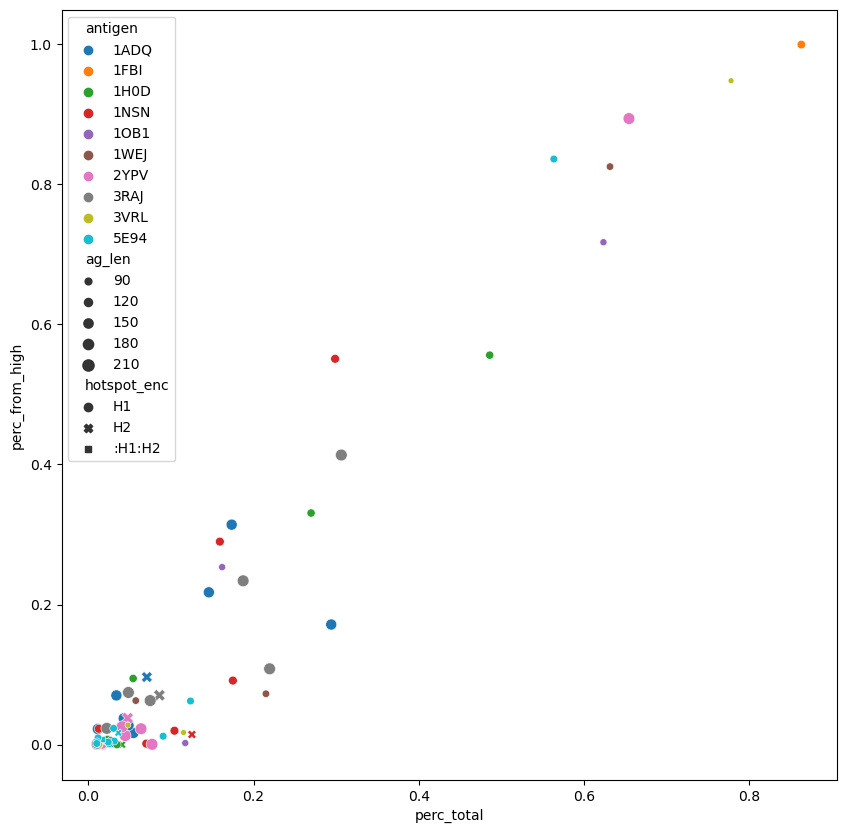

In [36]:
# Process and harmonize Hotspot IDs
for i, row in df_epi.iterrows():
    hs = row["hotspot_ID"]
    lbl = row["antigen_wchain"]  # previously label
    if hs.count(lbl) > 1:
        hs_enc = ":".join(hs.split(lbl + "_"))
    elif hs.count(lbl) == 1:
        hs_enc = hs.split(lbl + "_")[-1]
    elif hs == "Unknown":
        hs_enc = "Unknown"
    else:
        print(hs, lbl)
        raise ValueError()
    df_epi.loc[i, "hotspot_enc"] = hs_enc

# Filter for epitopes with %total > 1%
df_epi = df_epi.query("perc_total > 0.01")

# Add ag len
df_epi["ag_len"] = df_epi["masked_seq"].apply(lambda x: len(x))

# Scatterplot with x-axis %high and y-axis %total, color
# by antigen, size of the point by the length of the antigen,
# and style of point by the hotspot_enc.

plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_epi, y="perc_from_high", x="perc_total", hue="antigen", size="ag_len", style="hotspot_enc")

In [37]:
"1ADQ_A_H1".count("1ADQ_A")

1